# Non-Linear Decision Boundaries and KNN

In [1]:
using Plots, Distributions, Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


In [2]:
xdist = Normal(0.5,0.2)
x1 = rand(xdist,1000)
x2 = rand(xdist,1000);

In [ ]:
scatter(x1,x2)

In [ ]:

f(x;b=[1,2,3]) = exp(b[1]*x[1]^2 + b[2]*x[2] + b[3]*x[1]*x[2])/
                (1+exp(b[1]*x[1]^2 + b[2]*x[2] + b[3]*x[1]*x[2]))

In [ ]:
class = []
for i = 1:1000
    if f([x1[i] x2[i]];b=[3,1,-5]) < 0.5
        push!(class,false)
    else
        push!(class,true)
    end
end
class;

In [ ]:
scatter(x1[findall(class)],x2[findall(class)],color=:red)
scatter!(x1[findall(.!class)],x2[findall(.!class)],color=:blue)

In [8]:
f(x;b=[4,1,-5]) = b[1]*sin(4*pi*x[1])*cos(4*pi*x[2]);

In [ ]:
class = []
for i = 1:length(x1)
    if f([x1[i] x2[i]];b=[4,1,-5]) < 0.5
        push!(class,false)
    else
        push!(class,true)
    end
end
class

In [ ]:
scatter(x1[findall(class)],x2[findall(class)],color=:red, label="A",
    title="Raw Data")
scatter!(x1[findall(.!class)],x2[findall(.!class)],color=:blue, label="B")

In [ ]:
function myKNN_func(t; D1=x1, D2=x2, classes = class, K = 1, thresh = 0.5)
    dists = sqrt.((D1 .- t[1]).^2 + (D2 .- t[2]).^2)
    sort_dist = sortperm(dists)[1:K]
    temp = mean(classes[sort_dist])
    print(temp)
    indclass = !(temp < thresh)
    return indclass
end

In [ ]:
my_subset = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
findall(my_subset .== 1)

In [ ]:
my_subset = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
findall(my_subset .!= 1)

In [ ]:
my_subset = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]

myKNN_func([0 0.5]; D1=x1[my_subset], D2=x2[my_subset], classes=class[my_subset], K=3)

In [ ]:
function myKNN(K; x1 = x1, x2 = x2)
    kn1 = 0:0.025:1
    kn2 = 0:0.025:1
    knnx = zeros(length(kn1)*length(kn2))
    knny = zeros(length(kn1)*length(kn2))
    knn = zeros(Bool,length(kn1)*length(kn2))
    knn_mat = zeros(length(kn1),length(kn2))
    thresh = 0.5
    count = 1
    for i in 1:length(kn1), j in 1:length(kn2)
        dists = sqrt.((x1 .- kn1[i]).^2 + (x2 .- kn2[j]).^2)
        sort_dist = sortperm(dists)[1:K]
        temp = mean(class[sort_dist])
        indclass = !(temp < thresh)
        knnx[count] = kn1[i]
        knny[count] = kn2[j]
        knn[count] = indclass
        knn_mat[i,j] = indclass
        count += 1
    end
    return K, knn, knnx, knny, knn_mat
end;

In [ ]:
K, knn, knnx, knny, knn_mat = myKNN(1)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

In [ ]:
heatmap(0:0.025:1, 0:0.025:1, knn_mat,transpose=true)
scatter!(x1[findall(class)],x2[findall(class)],color=:red, label="A",
    title="Raw Data")
scatter!(x1[findall(.!class)],x2[findall(.!class)],color=:blue, label="B")

In [ ]:
K, knn, knnx, knny = myKNN(2)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

In [ ]:
K, knn, knnx, knny = myKNN(5)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

In [ ]:
K, knn, knnx, knny, knn_mat = myKNN(10)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

In [ ]:
GC.gc()
@time K, knn, knnx, knny = myKNN(50)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

In [ ]:
K, knn, knnx, knny = myKNN(100)
scatter(knnx[findall(knn)],knny[findall(knn)],color=:red, label="A",
    title="KNN - K=$K")
scatter!(knnx[findall(.!knn)],knny[findall(.!knn)],color=:blue, label="B")

## Cross Fold Validation

In [2]:
using Random

In [22]:

    
function calc_er(test_class, estimated_class)
        #each array has the same length, having true or false
        
        num_errors = 0
        len = length(test_class)
        for i in 1:len
            if test_class[i] != estimated_class[i]#if estimated class is different from actual class
                num_errors+=1
            end
        end
            
        return num_errors/len
end
        
function ttsplit(num_fold,test_num,perm, x1, x2)
    ###j == which group will become test group
    tra_x1 = []
    tra_x2 = []
    test_x1= []
    test_x2= []
    
    for idx in 1:length(perm)
        if idx % num_fold == test_num % num_fold #if (idx=test_num)mod num_fold ->test case
            push!(test_x1,x1[perm[idx]])##e.g. if perms = [2,5,3,4,1], num_fold=2
            push!(test_x2,x2[perm[idx]])##then x[2],x[3],x[1] -> test, x[5], x[4]->train
        else
            push!(tra_x1, x1[perm[idx]])
            push!(tra_x2, x2[perm[idx]])
        end
    end
    return tra_x1,tra_x2,test_x1,test_x2
end
        
function myKNN_func2(t; D1=x1, D2=x2, classes=class, K=1, thresh=0.5)
    #t is n by 2 matrix where n is the number of the data point
    #based on D1 and D2 that are the train data and classes that is train data's class
    #estimate if each test data point (t[i,1],t[i,2]) is true or false
    #each estimated result will be stored in the indclass 
    indclass = []
    for i in 1:length(t[:,1])
        dists = sqrt.((D1 .- t[i,1]).^2 + (D2 .- t[i,2]).^2)
        sort_dist = sortperm(dists)[1:K]
        temp = mean(classes[sort_dist])
        push!(indclass,!(temp <= thresh))
        dists=[]
    end
    return indclass
end

function find_classes(x1,x2,f; b=[4,1,-5])
    class = []
    for i = 1:length(x1)
        if f([x1[i] x2[i]];b=b) < 0.5
            push!(class,false)
        else
            push!(class,true)
        end
    end
    return class
end

find_classes (generic function with 1 method)

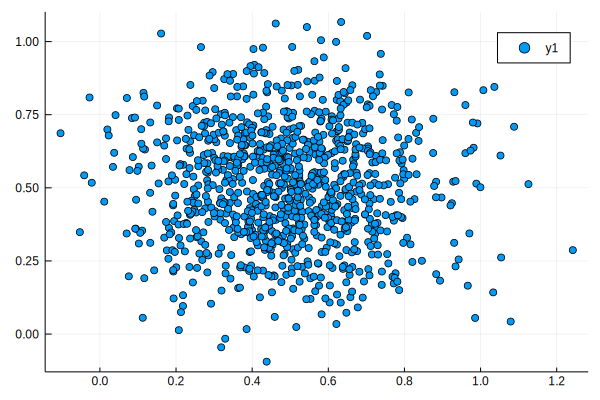

In [6]:
# a = [1,2,3,4,5]
# findfirst(isequal(min(a...)),a)

xdist = Normal(0.5,0.2)
x1 = rand(xdist,1000)
x2 = rand(xdist,1000);
scatter(x1,x2)

In [26]:
function my_cv(f,num_fold,x1,x2)
    perm = randperm(length(x1))
    num_errors=[]
    avg_errors=[]

    for num_neighbor in 1:10
        for test_num in 1:num_fold 
            tr_x1,tr_x2,te_x1,te_x2 = ttsplit(num_fold,test_num,perm, x1, x2)
            tr_class = find_classes(tr_x1,tr_x2,f)
            test_class = find_classes(te_x1, te_x2,f) 
            estimated_class = myKNN_func2([te_x1 te_x2]; D1=tr_x1, D2=tr_x2, classes=tr_class, K=num_neighbor)
            push!(num_errors,calc_er(test_class,estimated_class))                
        end
        push!(avg_errors,mean(num_errors))
        num_errors=[]
    end
    return avg_errors
#     return minimum(avg_errors), argmin(avg_errors)
#     return findfirst(isequal(min(avg_errors...)),avg_errors), min(avg_errors...) ## minimum num neighbor, minimum error rates 
            
end


my_cv (generic function with 1 method)

In [30]:
for i in 1:25
    ary = my_cv(f,5,x1,x2)
    plot!(ary)
end

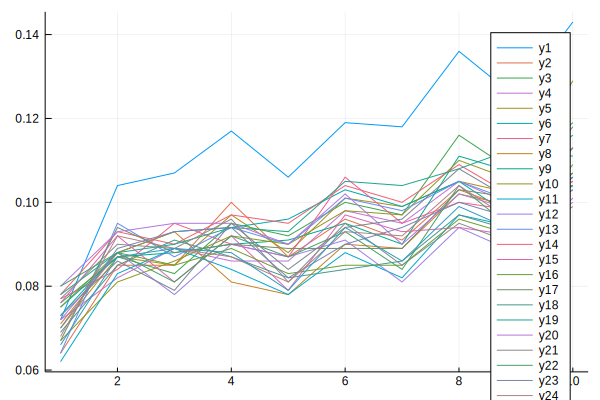

In [31]:
plot!()

In [69]:
a = [1,2,3]
b = [4,5,6]
c = [a b]
length(c[:,1])
b = randperm(20)

20-element Array{Int64,1}:
 20
  9
 15
 12
  1
  2
 10
  7
  8
 11
 17
 18
 14
  4
  6
  5
 16
  3
 13
 19

In [70]:
a = [x for x in 1:20]
c = a
println(a)
println(b)
num_fold = 4

for i in 1:4 
    x,y,z,j = ttsplit(num_fold, i, b, a, c)
    println(z)
end
println(length(x)," ", length(y)," ",length(z)," ",length(j))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[20, 9, 15, 12, 1, 2, 10, 7, 8, 11, 17, 18, 14, 4, 6, 5, 16, 3, 13, 19]
Any[20, 1, 8, 14, 16]
Any[9, 2, 11, 4, 3]
Any[15, 10, 17, 6, 13]
Any[12, 7, 18, 5, 19]
15 15 5 5
